In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
customer_data = pd.read_csv('purchase_behaviour.csv')
transaction_behavior = pd.read_excel('transaction_data.xlsx' , engine= 'openpyxl')

In [3]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transaction_behavior.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
# converting the column names to lowercase
customer_data.columns = customer_data.columns.str.lower()
transaction_behavior.columns = transaction_behavior.columns.str.lower()

In [6]:
# Merging the data
df = pd.merge(customer_data, transaction_behavior, on='lylty_card_nbr', how='right')

In [7]:
# Renaming the columns
df.rename(columns= {'lylty_card_nbr': 'loyalty_card_nbr', 'premium_customer': 'customer_segment', 'txn_id': 'transaction_id', 'tot_sales': 'total_sales'}, inplace=True)

In [8]:
# Converting the column Lifestage to lowercase (Title type)
df['lifestage'] = df['lifestage'].str.title()

In [9]:
print(df['lifestage'].unique())
print(df['lifestage'].value_counts())

['Young Singles/Couples' 'Midage Singles/Couples' 'New Families'
 'Older Families' 'Older Singles/Couples' 'Retirees' 'Young Families']
lifestage
Older Singles/Couples     54479
Retirees                  49763
Older Families            48596
Young Families            43592
Young Singles/Couples     36377
Midage Singles/Couples    25110
New Families               6919
Name: count, dtype: int64


In [10]:
# Remove the duplicate in the dataset
df.drop_duplicates(inplace=True)

In [11]:
# check for missing value in total_sales column 
missing_value = df['total_sales'].isna().sum()
print(missing_value)

0


In [12]:
# save the cleaned dataset
df.to_csv('cleaned_data.csv', index=False)
df = pd.read_csv('cleaned_data.csv')

# Data analysis and segmentation

In [13]:
# overall total sales
total_sales = df['total_sales'].sum()
print(total_sales)

1934408.9999999998


customer_segment
Budget        676211.55
Mainstream    750744.50
Premium       507452.95
Name: total_sales, dtype: float64


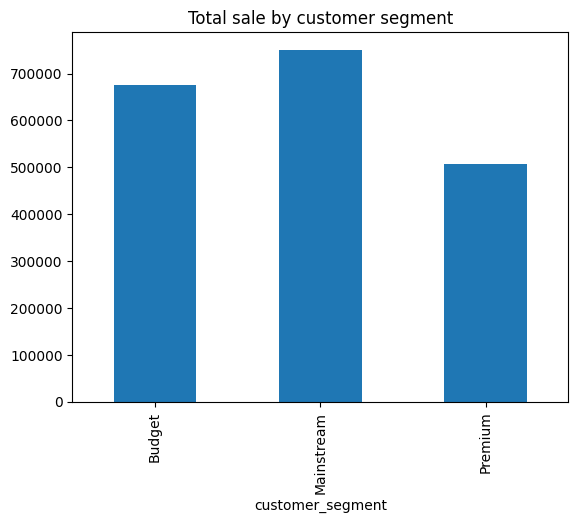

In [14]:
# Total sale by customer segment
sales_by_segment = df.groupby('customer_segment')['total_sales'].sum()
#avg_sales_by_segment = df.groupby('customer_segment')['total_sales'].mean()
#print(avg_sales_by_segment)
print(sales_by_segment)
plt.title('Total sale by customer segment')
sales_by_segment.plot(kind='bar')
plt.show()

In [15]:
# Number of transactions and number of unique Customer
num_transactions = df['transaction_id'].nunique()
num_customers = df['loyalty_card_nbr'].nunique()

print(f"Number of transaction: {num_transactions}")
print(f"Number of unique customer: {num_customers}")

Number of transaction: 263127
Number of unique customer: 72637


In [16]:
customer_counts_by_segment = df.groupby('customer_segment')['loyalty_card_nbr'].nunique().sort_values(ascending=False)
print(customer_counts_by_segment)

customer_segment
Mainstream    29245
Budget        24470
Premium       18922
Name: loyalty_card_nbr, dtype: int64


In [17]:
sales_mainstream = 750744.50
sales_budget = 676211.55
sales_premium = 507452.95

customers_mainstream = 29245
customers_budget = 24470
customers_premium = 18922

# The average spending per customer for each segment
avg_spending_mainstream = sales_mainstream / customers_mainstream
avg_spending_budget = sales_budget / customers_budget
avg_spending_premium = sales_premium / customers_premium

print(f"Average spending per Mainstream customer: ${avg_spending_mainstream:.2f}")
print(f"Average spending per Budget customer: ${avg_spending_budget:.2f}")
print(f"Average spending per Ppremium customer: ${avg_spending_premium:.2f}")

Average spending per Mainstream customer: $25.67
Average spending per Budget customer: $27.63
Average spending per Ppremium customer: $26.82


In [18]:
transactions_per_customer_segment = df.groupby(['customer_segment', 'loyalty_card_nbr'])['transaction_id'].nunique().reset_index(name='num_transactions')

average_transactions_per_segment = transactions_per_customer_segment.groupby('customer_segment')['num_transactions'].mean().sort_values(ascending=False)

print("Average number of transactions per customer by segment:")
print(average_transactions_per_segment)

Average number of transactions per customer by segment:
customer_segment
Budget        3.780629
Premium       3.658916
Mainstream    3.466678
Name: num_transactions, dtype: float64


In [19]:
total_revenue = 1934409.00
num_transactions = 263127
num_customers = 72637

# Average transaction value
average_transaction_value = total_revenue / num_transactions

# Average spending per customer
average_spending_per_customer = total_revenue / num_customers

print(f"Average transaction value: ${average_transaction_value:.2f}")
print(f"Average spending per customer: ${average_spending_per_customer:.2f}")

Average transaction value: $7.35
Average spending per customer: $26.63


lifestage
Midage Singles/Couples    184751.30
New Families               50433.45
Older Families            353767.20
Older Singles/Couples     402420.75
Retirees                  366470.90
Young Families            316160.10
Young Singles/Couples     260405.30
Name: total_sales, dtype: float64


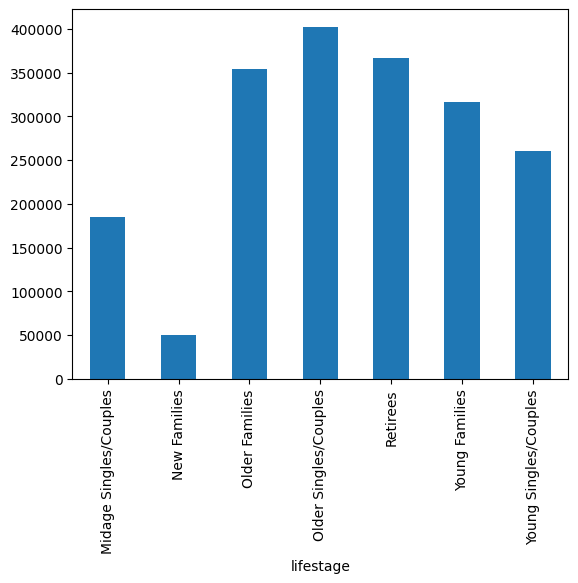

In [20]:
# Total sales by lifestage
sales_by_segment = df.groupby('lifestage')['total_sales'].sum()
print(sales_by_segment)
sales_by_segment.plot(kind='bar')
plt.show()

In [21]:
# The average quantity per transaction (overall)
average_quantity_overall = df.groupby('transaction_id')['prod_qty'].sum().mean()
print(f"Average quantity per transaction (overall): {average_quantity_overall}")

Average quantity per transaction (overall): 1.9196889714852523


Average quantity per transaction per customer segment:
customer_segment
Budget        1.922972
Mainstream    1.913191
Premium       1.924762
Name: prod_qty, dtype: float64


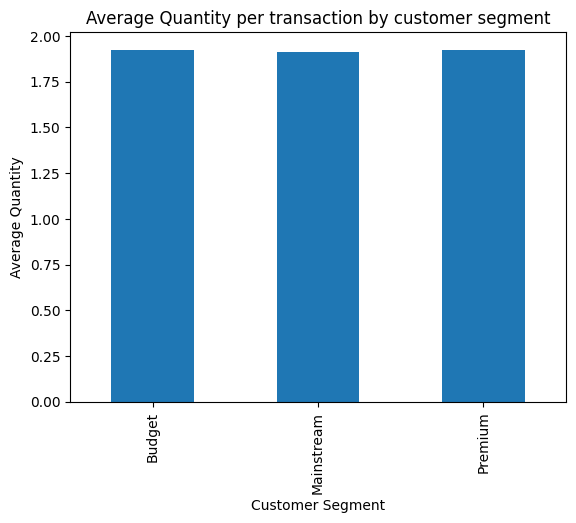

In [22]:
# The average quantity per transaction per customer segment
average_quantity_per_segment = df.groupby(['customer_segment', 'transaction_id'])['prod_qty'].sum().groupby('customer_segment').mean()
print("Average quantity per transaction per customer segment:")
print(average_quantity_per_segment)

average_quantity_per_segment.plot(kind='bar')
plt.title('Average Quantity per transaction by customer segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Quantity')
plt.show()

In [23]:
# Customer segment by Lifestage
cross_tab = pd.crosstab(df['lifestage'], df['customer_segment'])

print(cross_tab)

customer_segment        Budget  Mainstream  Premium
lifestage                                          
Midage Singles/Couples    5020       11874     8216
New Families              3005        2325     1589
Older Families           23160       14244    11192
Older Singles/Couples    18407       18318    17753
Retirees                 15201       21466    13096
Young Families           19122       12907    11563
Young Singles/Couples     9242       20854     6281


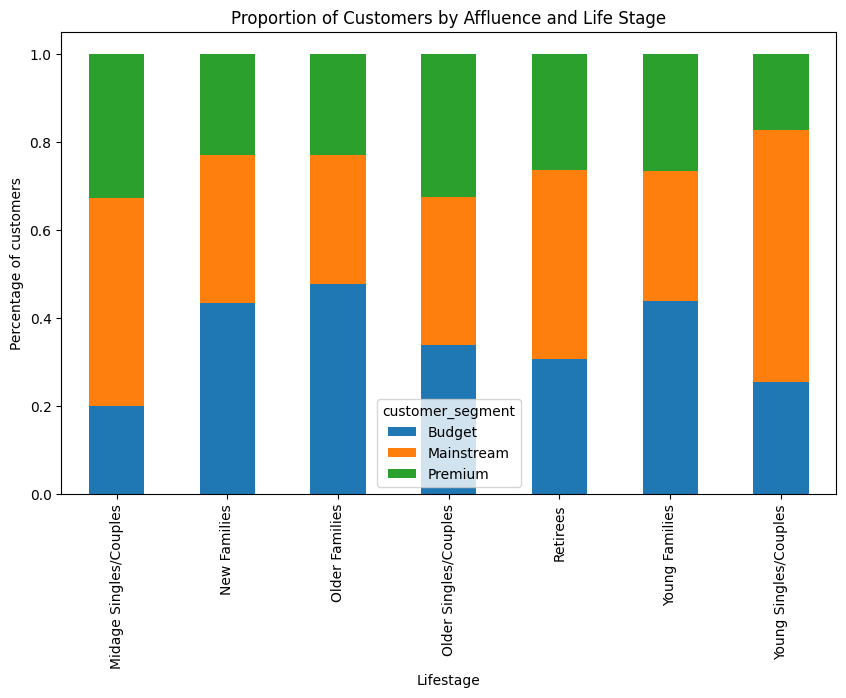

In [24]:
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0) #Normalize the crosstab.

cross_tab_normalized.plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.title("Proportion of Customers by Affluence and Life Stage")
plt.xlabel("Lifestage")
plt.ylabel("Percentage of customers")
plt.show()

Top 10 products by Total sales:
prod_name
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: total_sales, dtype: float64


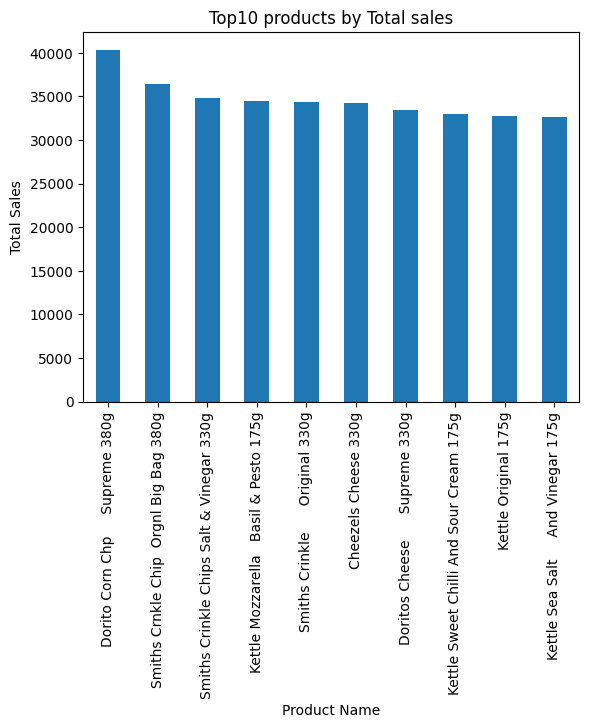

In [25]:
# Top 10 Product by sales
# Group by product name and sum the total sales
product_sales = df.groupby('prod_name')['total_sales'].sum()

# Sort the sales in descending order
top_10_products = product_sales.sort_values(ascending=False).head(10)
print("Top 10 products by Total sales:")
print(top_10_products)

# Visualize the top 10 products
top_10_products.plot(kind='bar')
plt.title('Top10 products by Total sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

Bottom 10 worst-performing products by Total Salrs:
prod_name
Woolworths Medium   Salsa 300g              4050.0
Woolworths Mild     Salsa 300g              4234.5
WW Crinkle Cut      Original 175g           4532.2
Sunbites Whlegrn    Crisps Frch/Onin 90g    4600.2
WW Crinkle Cut      Chicken 175g            4702.2
Snbts Whlgrn Crisps Cheddr&Mstrd 90g        5076.2
Woolworths Cheese   Rings 190g              5169.6
WW D/Style Chip     Sea Salt 200g           5249.7
WW Original Stacked Chips 160g              5323.8
WW Sour Cream &OnionStacked Chips 160g      5323.8
Name: total_sales, dtype: float64


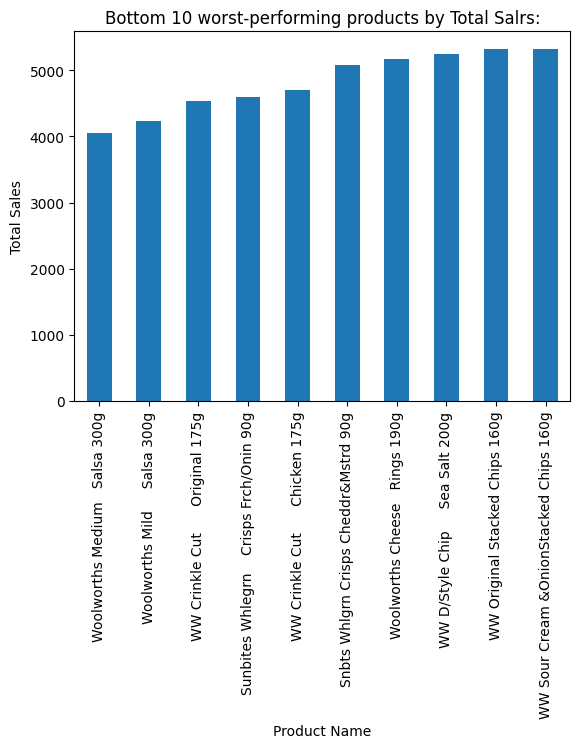

In [26]:
# Top 10 worst sales product
product_sales = df.groupby('prod_name')['total_sales'].sum()
worst_performing_products = product_sales.sort_values(ascending=True).head(10)

print("Bottom 10 worst-performing products by Total Salrs:")
print(worst_performing_products)

worst_performing_products.plot(kind='bar')
plt.title('Bottom 10 worst-performing products by Total Salrs:')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/178931708.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_segment = product_popularity.groupby('customer_segment', group_keys=False).apply(


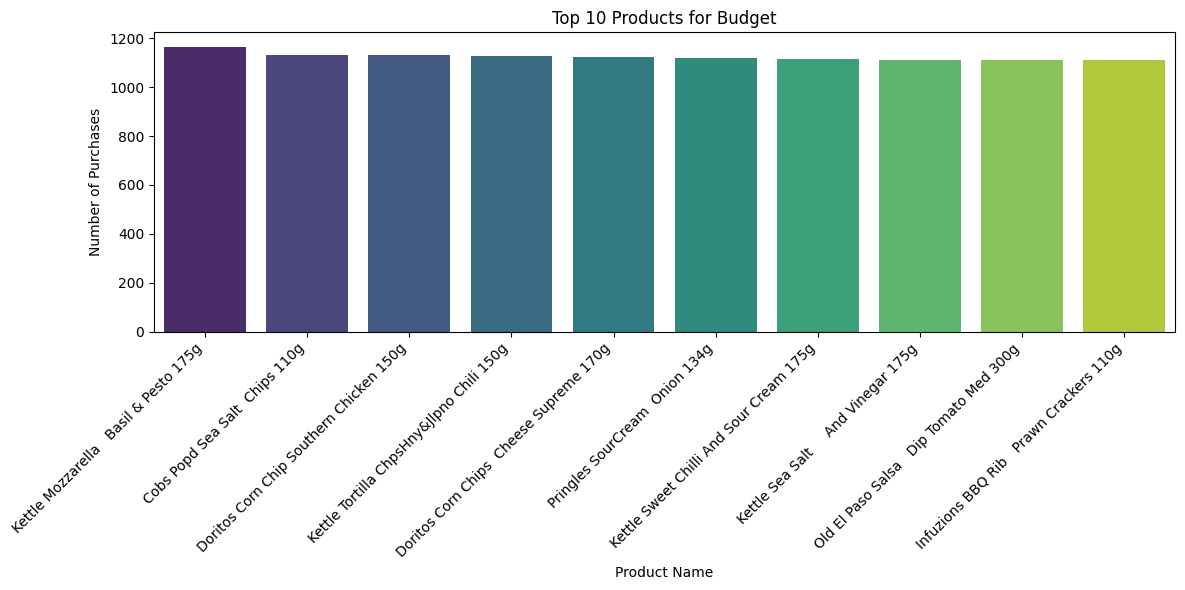

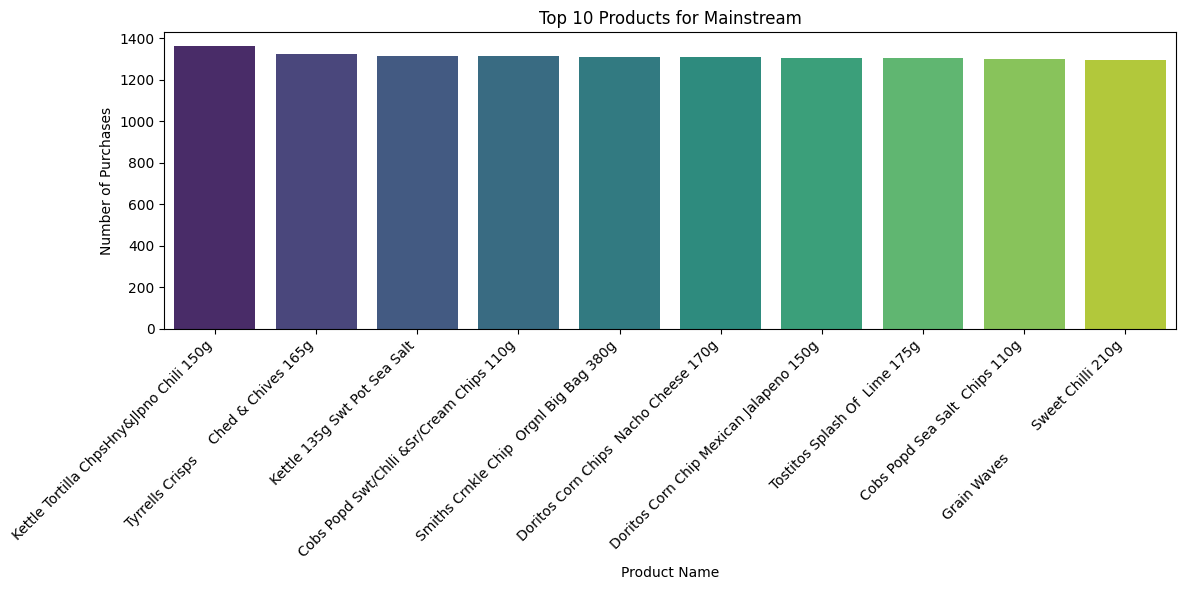

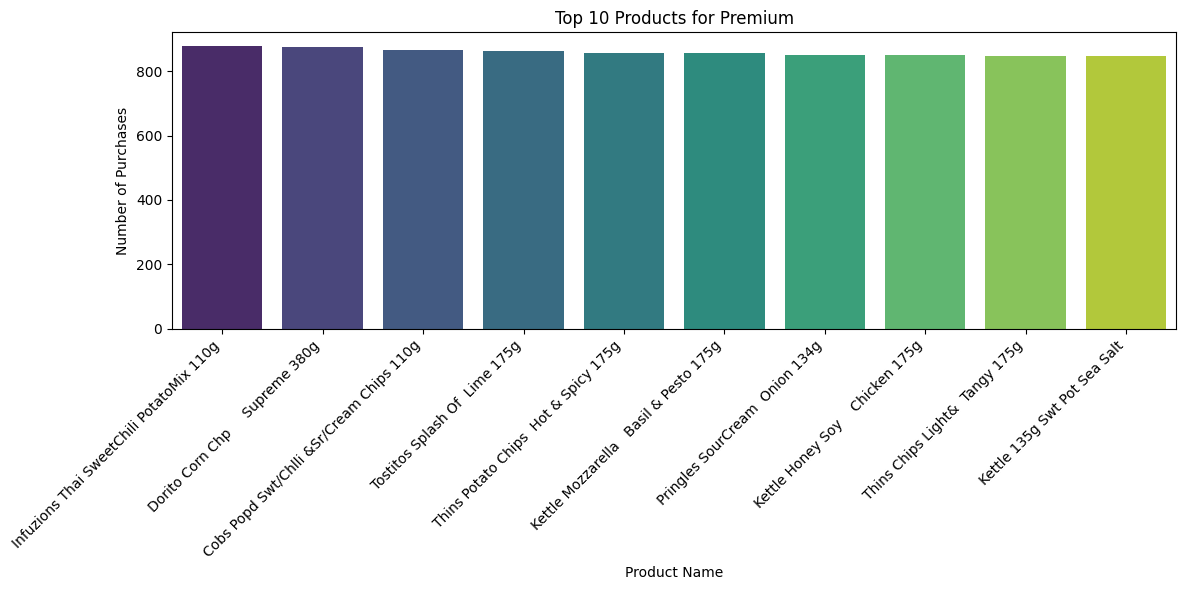

In [27]:
 # Group by customer segment and product name, then count product occurrences
product_popularity = df.groupby(['customer_segment', 'prod_name'])['transaction_id'].count().reset_index(name='purchase_count')

# Finding the top N most popular products for each customer segment
top_n = 10 
top_products_per_segment = product_popularity.groupby('customer_segment', group_keys=False).apply(
    lambda x: x.nlargest(top_n, 'purchase_count')
).reset_index(drop=True)

for segment in top_products_per_segment['customer_segment'].unique():
    segment_data = top_products_per_segment[top_products_per_segment['customer_segment'] == segment]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='prod_name', y='purchase_count', data=segment_data, palette='viridis', hue='prod_name')
    plt.title(f'Top {top_n} Products for {segment}')
    plt.xlabel('Product Name')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [28]:
product_popularity = df.groupby(['customer_segment', 'prod_name'])['transaction_id'].count().reset_index(name='purchase_count')
top_n = 5
top_products_per_segment = product_popularity.groupby('customer_segment').apply(lambda x: x.nlargest(top_n, 'purchase_count')).reset_index(drop=True)
print(top_products_per_segment)

   customer_segment                                 prod_name  purchase_count
0            Budget    Kettle Mozzarella   Basil & Pesto 175g            1166
1            Budget            Cobs Popd Sea Salt  Chips 110g            1132
2            Budget   Doritos Corn Chip Southern Chicken 150g            1132
3            Budget  Kettle Tortilla ChpsHny&Jlpno Chili 150g            1128
4            Budget   Doritos Corn Chips  Cheese Supreme 170g            1124
5        Mainstream  Kettle Tortilla ChpsHny&Jlpno Chili 150g            1360
6        Mainstream    Tyrrells Crisps     Ched & Chives 165g            1324
7        Mainstream              Kettle 135g Swt Pot Sea Salt            1316
8        Mainstream  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g            1313
9        Mainstream    Smiths Crnkle Chip  Orgnl Big Bag 380g            1309
10          Premium  Infuzions Thai SweetChili PotatoMix 110g             877
11          Premium          Dorito Corn Chp     Supreme 380g   

/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/2594769472.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_segment = product_popularity.groupby('customer_segment').apply(lambda x: x.nlargest(top_n, 'purchase_count')).reset_index(drop=True)


Top 10 Products by total Sales:
store_nbr
226    18905.45
88     16333.25
165    15973.75
40     15559.50
237    15539.50
58     15251.45
199    14797.00
4      14647.65
203    14551.60
26     14469.30
Name: total_sales, dtype: float64


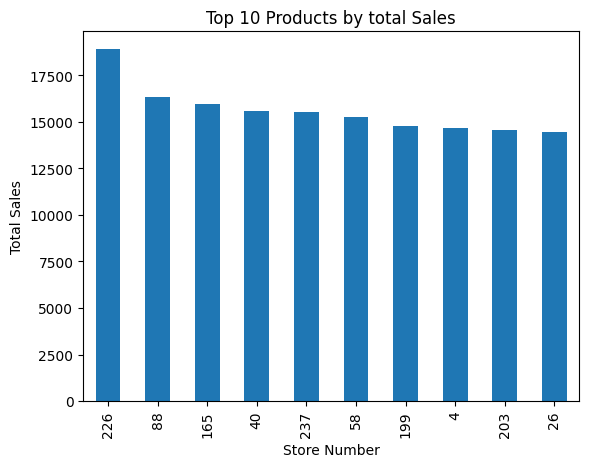

In [29]:
# Top sale product by store

product_sales = df.groupby('store_nbr')['total_sales'].sum()
top_10_products = product_sales.sort_values(ascending=False).head(10)

print("Top 10 Products by total Sales:")
print(top_10_products)

top_10_products.plot(kind='bar')
plt.title('Top 10 Products by total Sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

In [30]:
# The average number of transactions per customer.

transactions_per_customer = df.groupby('loyalty_card_nbr')['transaction_id'].nunique()
average_transactions_per_customer = transactions_per_customer.mean()

print(f"Average number of transactions per customer: {average_transactions_per_customer}")


Average number of transactions per customer: 3.6225202032022246


In [31]:
#the average spending per customer.

total_spending_per_customer = df.groupby('loyalty_card_nbr')['total_sales'].sum()
average_spending_per_customer = total_spending_per_customer.mean()

print(f"Average spending per customer: ${average_spending_per_customer:.2f}")

Average spending per customer: $26.63


In [32]:
# Dealing with date format data type
df['date_numeric'] = pd.to_numeric(df['date'], errors='coerce')
df['date'] = pd.to_datetime(df['date_numeric'], origin='1899-12-30', unit='D', errors='coerce')
df.drop(columns=['date_numeric'], inplace=True, errors='ignore')
df_valid_dates = df.dropna(subset=['date'])

date
2018-07    165275.30
2018-08    158731.05
2018-09    160522.00
2018-10    164409.70
2018-11    160233.70
2018-12    167913.40
2019-01    162642.30
2019-02    150665.00
2019-03    166265.20
2019-04    159845.10
2019-05    157367.65
2019-06    160538.60
Freq: M, Name: total_sales, dtype: float64


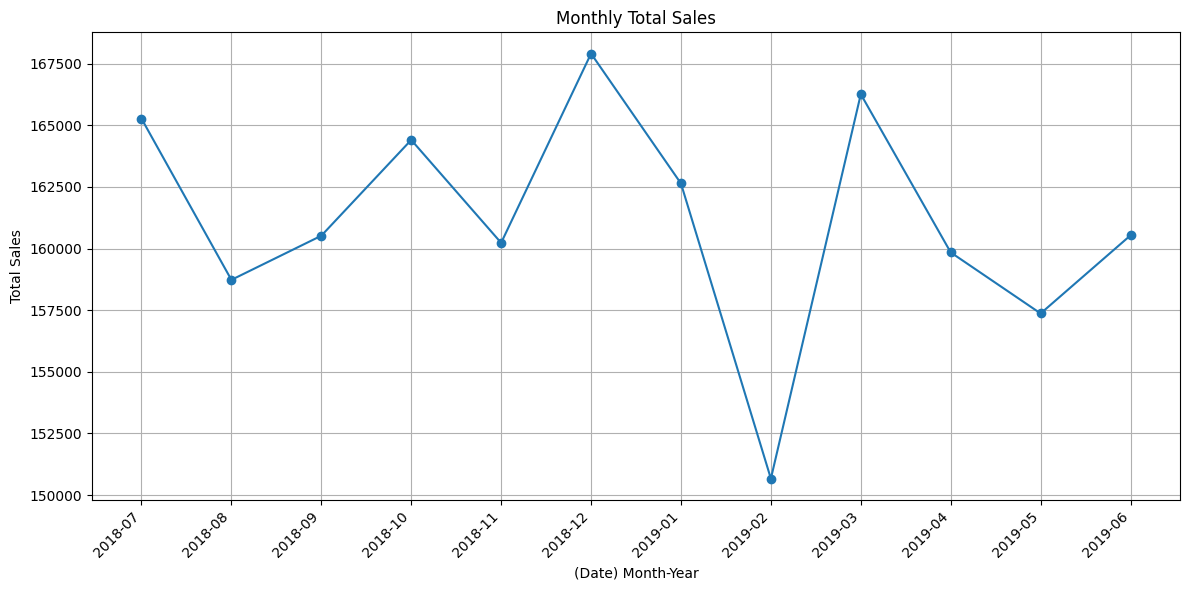

In [33]:
# Total sales for each month
monthly_sales = df.groupby(df['date'].dt.to_period('M'))['total_sales'].sum()
print(monthly_sales)

df['month_year'] = df['date'].dt.to_period('M')

# Group by month and year and sum the total sales
monthly_sales = df.groupby('month_year')['total_sales'].sum().reset_index()

# Visualize total sales over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['total_sales'], marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('(Date) Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Extract pack size and Brand name features

# create new columns in our dataset based on the information in the prod_name column.
import re
def extract_pack_size(prod_name):
    """Extracts pack size (in grams) from the product name (case-insensitive 'g')."""
    match = re.search(r'(\d+g)', prod_name, re.IGNORECASE)
    if match:
        return int(match.group(1).replace('g', '').replace('G', ''))
    return None

def extract_brand_name(prod_name):
    """Extracts the brand name from the product name."""
    return prod_name.split(' ')[0].strip()

df['pack_size'] = df['prod_name'].apply(extract_pack_size)
df['brand_name'] = df['prod_name'].apply(extract_brand_name)

print("Dataset with new 'pack_size' and 'brand_name' columns:")
print(df.head())

average_pack_size_by_segment = df.groupby('customer_segment')['pack_size'].mean().sort_values(ascending=False)
print("\nAverage Pack Size Purchased per Customer Segment:")
print(average_pack_size_by_segment)

spending_by_brand_segment = df.groupby(['customer_segment', 'brand_name'])['total_sales'].sum().unstack(fill_value=0)
print("\nTotal Spending by Brand per Customer Segment:")
print(spending_by_brand_segment)

Dataset with new 'pack_size' and 'brand_name' columns:
   loyalty_card_nbr               lifestage customer_segment       date  \
0              1000   Young Singles/Couples          Premium 2018-10-17   
1              1307  Midage Singles/Couples           Budget 2019-05-14   
2              1343  Midage Singles/Couples           Budget 2019-05-20   
3              2373  Midage Singles/Couples           Budget 2018-08-17   
4              2426  Midage Singles/Couples           Budget 2018-08-18   

   store_nbr  transaction_id  prod_nbr  \
0          1               1         5   
1          1             348        66   
2          1             383        61   
3          2             974        69   
4          2            1038       108   

                                  prod_name  prod_qty  total_sales month_year  \
0    Natural Chip        Compny SeaSalt175g         2          6.0    2018-10   
1                  CCs Nacho Cheese    175g         3          6.3    2019-05  

In [35]:
# Average Pack Size Purchased per Customer Segment

average_pack_size_by_segment = df.groupby('customer_segment')['pack_size'].mean().sort_values(ascending=False)
print("\nAverage pack size Purchased per Customer Segment:")
print(average_pack_size_by_segment)


Average pack size Purchased per Customer Segment:
customer_segment
Mainstream    182.834520
Budget        182.181479
Premium       182.158932
Name: pack_size, dtype: float64


In [36]:
# Total Spending by Brand per Customer Segment

spending_by_brand_segment = df.groupby(['customer_segment', 'brand_name'])['total_sales'].sum().unstack(fill_value=0)
print("\nTotal Spending by Brand per Customer Segment:")
print(spending_by_brand_segment.head()) # Displaying the head for brevity


Total Spending by Brand per Customer Segment:
brand_name        Burger     CCs  Cheetos  Cheezels     Cobs    Dorito  \
customer_segment                                                         
Budget            2527.7  6657.0   6071.6   13983.9  23780.4  13068.25   
Mainstream        2392.0  6507.9   6374.1   15303.3  28363.2  15366.00   
Premium           1911.3  4914.0   4438.8   10742.7  18426.2  11917.75   

brand_name        Doritos  French    Grain  GrnWves  ...   Smith   Smiths  \
customer_segment                                     ...                    
Budget            70893.0  3042.0  14558.4   3211.6  ...  5525.0  75219.0   
Mainstream        80272.9  2829.0  17208.0   3025.6  ...  5166.2  79560.0   
Premium           50373.0  2058.0  11282.4   2331.2  ...  3892.2  55291.8   

brand_name         Snbts  Sunbites    Thins  Tostitos  Twisties  Tyrrells  \
customer_segment                                                            
Budget            1943.1    1725.5  31066.

In [37]:
# spending per customer on Top brands within each segment
def top_brands_by_segment(df, n=3):
    """the top N brand by total sale within each customer sgment."""
    top_brands = df.groupby(['customer_segment', 'brand_name'])['total_sales'].sum().reset_index()
    top_brands_ranked = top_brands.groupby('customer_segment').apply(lambda x: x.nlargest(n, 'total_sales')).reset_index(drop=True)
    return top_brands_ranked

top_brands = top_brands_by_segment(df)
print("Top brands by Total Sales within each segment:")
print(top_brands)

def average_spending_on_top_brands(df, top_brands_df):
    """Calculate the avg spending per customer on the top brands within each segment."""
    segment_spending = df.groupby('customer_segment')['total_sales'].sum()
    segment_customer_counts = df.groupby('customer_segment')['loyalty_card_nbr'].nunique()
    avg_spending_per_customer = segment_spending / segment_customer_counts

    results = {}
    for segment in df['customer_segment'].unique():
        top_brands_in_segment = top_brands_df[top_brands_df['customer_segment'] == segment]['brand_name'].tolist()
        segment_df = df[df['customer_segment'] == segment]
        spending_on_top_brands = segment_df[segment_df['brand_name'].isin(top_brands_in_segment)]['total_sales'].sum()
        num_customers_in_segment = segment_customer_counts[segment]
        avg_spending = spending_on_top_brands / num_customers_in_segment if num_customers_in_segment > 0 else 0
        results[segment] = {
            'top_brands': top_brands_in_segment,
            'average_spending_on_top_brands': f"${avg_spending:.2f}",
            'average_spending_all_products': f"${avg_spending_per_customer[segment]:.2f}"
        }
    return results

average_spending_results = average_spending_on_top_brands(df, top_brands)
print("\nAverage spending per customer on Top brands (and all product) by segment:")
for segment, data in average_spending_results.items():
    print(f"\n{segment} Segment:")
    print(f"  Top brand (by total sales): {data['top_brands']}")
    print(f"  Average spending on these top brands: {data['average_spending_on_top_brands']}")
    print(f"  Average spending on all pproducts: {data['average_spending_all_products']}")

Top brands by Total Sales within each segment:
  customer_segment brand_name  total_sales
0           Budget     Kettle     134407.8
1           Budget     Smiths      75219.0
2           Budget    Doritos      70893.0
3       Mainstream     Kettle     154477.0
4       Mainstream    Doritos      80272.9
5       Mainstream     Smiths      79560.0
6          Premium     Kettle     101355.0
7          Premium     Smiths      55291.8
8          Premium    Doritos      50373.0

Average spending per customer on Top brands (and all product) by segment:

Premium Segment:
  Top brand (by total sales): ['Kettle', 'Smiths', 'Doritos']
  Average spending on these top brands: $10.94
  Average spending on all pproducts: $26.82

Budget Segment:
  Top brand (by total sales): ['Kettle', 'Smiths', 'Doritos']
  Average spending on these top brands: $11.46
  Average spending on all pproducts: $27.63

Mainstream Segment:
  Top brand (by total sales): ['Kettle', 'Doritos', 'Smiths']
  Average spending on th

/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/17231210.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_brands_ranked = top_brands.groupby('customer_segment').apply(lambda x: x.nlargest(n, 'total_sales')).reset_index(drop=True)


Percentage distribtion of pack sizes purchased by customer segmet:
pack_size              70        90        110       125       134       135  \
customer_segment                                                               
Budget            0.596842  1.230181  8.201209  0.581813  9.253196  1.175435   
Mainstream        0.512805  1.021689  8.742205  0.495156  9.709966  1.290348   
Premium           0.614148  1.176639  8.367054  0.584015  9.440379  1.213947   

pack_size               150       160       165       170  ...       180  \
customer_segment                                           ...             
Budget            16.349818  1.204418  5.820282  7.614028  ...  0.581813   
Mainstream        16.243087  0.996196  5.738910  7.632270  ...  0.510844   
Premium           16.263452  1.193859  5.771273  7.326733  ...  0.581145   

pack_size              190       200       210       220       250       270  \
customer_segment                                                       

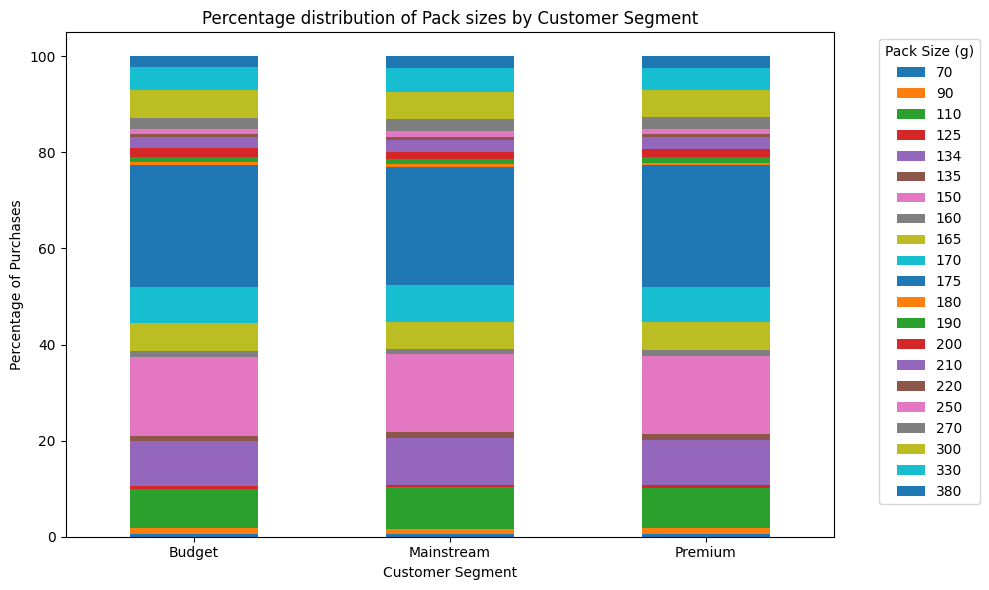

In [38]:

pack_size_distribution = df.groupby('customer_segment')['pack_size'].value_counts(normalize=True).mul(100).unstack(fill_value=0)

print("Percentage distribtion of pack sizes purchased by customer segmet:")
print(pack_size_distribution)

pack_size_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage distribution of Pack sizes by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Percentage of Purchases')
plt.xticks(rotation=0)
plt.legend(title='Pack Size (g)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
def top_brands_by_segment(df, n=3):
    top_brands = df.groupby(['customer_segment', 'brand_name'])['total_sales'].sum().reset_index()
    top_brands_ranked = top_brands.groupby('customer_segment').apply(lambda x: x.nlargest(n, 'total_sales')).reset_index(drop=True)
    return top_brands_ranked

top_brands = top_brands_by_segment(df)

def average_pack_size_top_brands_segment(df, top_brands_df):
    results = {}
    for segment in df['customer_segment'].unique():
        top_brands_in_segment = top_brands_df[top_brands_df['customer_segment'] == segment]['brand_name'].tolist()
        segment_df = df[df['customer_segment'] == segment]
        for brand in top_brands_in_segment:
            brand_df = segment_df[segment_df['brand_name'] == brand]
            avg_pack_size = brand_df['pack_size'].mean()
            if segment not in results:
                results[segment] = {}
            results[segment][brand] = f"{avg_pack_size:.2f}g"
    return results

avg_pack_size_top_brands = average_pack_size_top_brands_segment(df, top_brands)
print("\nAverage pack Size purchased for top brands within each Segment:")
print(avg_pack_size_top_brands)


Average pack Size purchased for top brands within each Segment:
{'Premium': {'Kettle': '160.44g', 'Smiths': '225.23g', 'Doritos': '199.08g'}, 'Budget': {'Kettle': '160.49g', 'Smiths': '223.79g', 'Doritos': '201.36g'}, 'Mainstream': {'Kettle': '160.13g', 'Doritos': '198.54g', 'Smiths': '231.13g'}}


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/760015101.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_brands_ranked = top_brands.groupby('customer_segment').apply(lambda x: x.nlargest(n, 'total_sales')).reset_index(drop=True)


# Part 2: 

## Control Store Selection

In [40]:
df

,loyalty_card_nbr,lifestage,customer_segment,date,store_nbr,transaction_id,prod_nbr,prod_name,prod_qty,total_sales,month_year,pack_size,brand_name
0,1000,Young Singles/Couples,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10,175,Natural
1,1307,Midage Singles/Couples,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05,175,CCs
2,1343,Midage Singles/Couples,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05,170,Smiths
3,2373,Midage Singles/Couples,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08,175,Smiths
4,2426,Midage Singles/Couples,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08,150,Kettle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,272319,Young Singles/Couples,Premium,2019-03-09,272,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03,175,Kettle
264831,272358,Young Singles/Couples,Premium,2018-08-13,272,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08,175,Tostitos
264832,272379,Young Singles/Couples,Premium,2018-11-06,272,270187,51,Doritos Mexicana 170g,2,8.8,2018-11,170,Doritos
264833,272379,Young Singles/Couples,Premium,2018-12-27,272,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12,150,Doritos


#### Select control stores for Trial Stores 77, 86, and 88 using defined metrics (considering total sales, total customers, and average transactions per customer) and visualize the drivers to support the selection.1

In [41]:
# Calculates monthly total sales, total customers, and average transactions per customer, including store_nbr
def calculate_monthly_metrics(data, store_nbr):
    monthly_data = data.groupby(pd.Grouper(key='date', freq='ME')).agg(
        total_sales=('total_sales', 'sum'),
        total_customers=('loyalty_card_nbr', 'nunique'),
        total_transactions=('transaction_id', 'nunique')
    ).reset_index()
    monthly_data['avg_txn_per_cust'] = monthly_data['total_transactions'] / monthly_data['total_customers']
    monthly_data['store_nbr'] = store_nbr
    return monthly_data

all_stores_monthly_list = []
for store in df['store_nbr'].unique():
    store_data = df[df['store_nbr'] == store].copy()
    monthly_data = calculate_monthly_metrics(store_data, store)
    all_stores_monthly_list.append(monthly_data)

all_stores_monthly = pd.concat(all_stores_monthly_list, ignore_index=True)

# the pre-trial end date (end of Feb 2019 based on our data)
pre_trial_end_date = pd.to_datetime('2019-02-28')
pre_trial_data_monthly = all_stores_monthly[all_stores_monthly['date'] <= pre_trial_end_date]

In [42]:
from scipy.stats import pearsonr

#  Calculates a combined similarity score based on Pearson correlation of key monthly metrics
def calculate_combined_similarity(trial_store_nbr, control_store_nbr, monthly_data, end_date):
    trial_data = monthly_data[monthly_data['store_nbr'] == trial_store_nbr].set_index('date')
    control_data = monthly_data[monthly_data['store_nbr'] == control_store_nbr].set_index('date')

    if trial_data.empty or control_data.empty:
        return None

    merged_data = pd.merge(trial_data, control_data, on='date', suffixes=('_trial', '_control'), how='inner')
    merged_pre_trial = merged_data[merged_data.index <= end_date]

    if len(merged_pre_trial) < 2:
        return None

    try:
        corr_sales, _ = pearsonr(merged_pre_trial['total_sales_trial'], merged_pre_trial['total_sales_control'])
        corr_customers, _ = pearsonr(merged_pre_trial['total_customers_trial'], merged_pre_trial['total_customers_control'])
        corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
    except ValueError as e:
        print(f"ValueError in correlation for stores {trial_store_nbr} and {control_store_nbr}: {e}")
        return None

    # Handle potential NaN value from correlation (if one of the series is constant)
    corr_sales = corr_sales if not pd.isna(corr_sales) else -1
    corr_customers = corr_customers if not pd.isna(corr_customers) else -1
    corr_txn_per_cust = corr_txn_per_cust if not pd.isna(corr_txn_per_cust) else -1

    # Combine the correlations
    combined_similarity = (corr_sales + corr_customers + corr_txn_per_cust) / 3
    return combined_similarity



In [43]:
#   Find the best control store based on the combined similarity score.
def find_best_control_store_combined(trial_store_nbr, monthly_data, end_date, excluded_stores=[77, 86, 88], min_months=6):
    best_control_store = None
    highest_similarity = -2.0

    # Make a local copy of the relevant part of monthly_data to ensure structure
    local_monthly_data = monthly_data[['store_nbr', 'date', 'total_sales', 'total_customers', 'avg_txn_per_cust']]

    trial_monthly = local_monthly_data[local_monthly_data['store_nbr'] == trial_store_nbr]

    if len(trial_monthly[trial_monthly['date'] <= end_date]) < min_months:
        print(f"Insufficient pre-trial data for Trial Store {trial_store_nbr}")
        return None, None

    potential_control_stores = local_monthly_data['store_nbr'].unique()
    for control_store_nbr in potential_control_stores:
        if control_store_nbr != trial_store_nbr and control_store_nbr not in excluded_stores:
            control_monthly = local_monthly_data[local_monthly_data['store_nbr'] == control_store_nbr]
            if len(control_monthly[control_monthly['date'] <= end_date]) >= min_months:
                similarity = calculate_combined_similarity(trial_store_nbr, control_store_nbr, monthly_data, end_date)
                if similarity is not None and similarity > highest_similarity:
                    highest_similarity = similarity
                    best_control_store = control_store_nbr
                    print(f"Combined Similarity of Store {control_store_nbr} with Trial Store {trial_store_nbr}: {similarity:.4f}")

    return best_control_store, highest_similarity



In [51]:
# Select control stores for 77, 86, and 88
best_control_77_combined, similarity_77_combined = find_best_control_store_combined(77, all_stores_monthly, pre_trial_end_date)
print(f"\nBest control store for Trial Store 77 (Combined): {best_control_77_combined}, Similarity: {similarity_77_combined:.4f}")

best_control_86_combined, similarity_86_combined = find_best_control_store_combined(86, all_stores_monthly, pre_trial_end_date)
print(f"Best control store for Trial Store 86 (Combined): {best_control_86_combined}, Similarity: {similarity_86_combined:.4f}")

best_control_88_combined, similarity_88_combined = find_best_control_store_combined(88, all_stores_monthly, pre_trial_end_date)
print(f"Best control store for Trial Store 88 (Combined): {best_control_88_combined}, Similarity: {similarity_88_combined:.4f}")

Combined Similarity of Store 1 with Trial Store 77: 0.0877
Combined Similarity of Store 5 with Trial Store 77: 0.2803
Combined Similarity of Store 20 with Trial Store 77: 0.3426
Combined Similarity of Store 33 with Trial Store 77: 0.4569
Combined Similarity of Store 62 with Trial Store 77: 0.5003
Combined Similarity of Store 71 with Trial Store 77: 0.5608
Combined Similarity of Store 115 with Trial Store 77: 0.5684
Combined Similarity of Store 119 with Trial Store 77: 0.7612


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarni


Best control store for Trial Store 77 (Combined): 119, Similarity: 0.7612
Combined Similarity of Store 1 with Trial Store 86: 0.2954
Combined Similarity of Store 13 with Trial Store 86: 0.4115
Combined Similarity of Store 22 with Trial Store 86: 0.6851


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarni

Best control store for Trial Store 86 (Combined): 22, Similarity: 0.6851
Combined Similarity of Store 1 with Trial Store 88: 0.1928
Combined Similarity of Store 13 with Trial Store 88: 0.3118
Combined Similarity of Store 41 with Trial Store 88: 0.3754
Combined Similarity of Store 106 with Trial Store 88: 0.4849


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])


Combined Similarity of Store 178 with Trial Store 88: 0.6196


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarni

Best control store for Trial Store 88 (Combined): 178, Similarity: 0.6196


/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_txn_per_cust, _ = pearsonr(merged_pre_trial['avg_txn_per_cust_trial'], merged_pre_trial['avg_txn_per_cust_control'])
/var/folders/5c/fblzqqy57nd5fh9f2_kv2k700000gn/T/ipykernel_65071/941957255.py:20: ConstantInputWarni

## Assess the trial performance

### Assess the trial performance of each trial store by comparing it to its control store during the trial period (assumed to be March 2019), determining if total sales were significantly different and identifying the drivers of change (customer numbers or purchase frequency).

In [45]:
   # assesses the trial performance by comparing trial and control stores for a specific trial month.
def assess_trial_performance(trial_store_nbr, control_store_nbr, monthly_data, pre_trial_end_date, trial_month_start, trial_month_end):
    trial_data_pre = monthly_data[(monthly_data['store_nbr'] == trial_store_nbr) & (monthly_data['date'] <= pre_trial_end_date)]
    control_data_pre = monthly_data[(monthly_data['store_nbr'] == control_store_nbr) & (monthly_data['date'] <= pre_trial_end_date)]
    trial_data_trial = monthly_data[(monthly_data['store_nbr'] == trial_store_nbr) & (monthly_data['date'] >= trial_month_start) & (monthly_data['date'] <= trial_month_end)]
    control_data_trial = monthly_data[(monthly_data['store_nbr'] == control_store_nbr) & (monthly_data['date'] >= trial_month_start) & (monthly_data['date'] <= trial_month_end)]

    if trial_data_trial.empty or control_data_trial.empty:
        print(f"No trial data available for Trial Store {trial_store_nbr} or Control Store {control_store_nbr} for the specified trial period.")
        return None

    # Calculate average pre-trial metrics (using the last 3 months for stability)
    n_pre_trial_months = 3
    trial_pre_avg = trial_data_pre.tail(n_pre_trial_months)[['total_sales', 'total_customers', 'avg_txn_per_cust']].mean()
    control_pre_avg = control_data_pre.tail(n_pre_trial_months)[['total_sales', 'total_customers', 'avg_txn_per_cust']].mean()

    # Get trial month metrics
    trial_month = trial_data_trial.iloc[0][['total_sales', 'total_customers', 'avg_txn_per_cust']]
    control_month = control_data_trial.iloc[0][['total_sales', 'total_customers', 'avg_txn_per_cust']]

    # Calculate percentage change from pre-trial average to trial month
    trial_change = ((trial_month - trial_pre_avg) / trial_pre_avg) * 100
    control_change = ((control_month - control_pre_avg) / control_pre_avg) * 100

    # Calculate the incremental impact of the trial
    incremental_impact = trial_change - control_change

    return incremental_impact

# Define the trial period (March 2019)
trial_month_start = pd.to_datetime('2019-03-01')
trial_month_end = pd.to_datetime('2019-03-31')

impact_77 = assess_trial_performance(77, 119, all_stores_monthly, pre_trial_end_date, trial_month_start, trial_month_end)
print("\nTrial Impact for Store 77:")
if impact_77 is not None:
    print(f"  Total Sales: {impact_77['total_sales']:.2f}%")
    print(f"  Total Customers: {impact_77['total_customers']:.2f}%")
    print(f"  Avg Txn per Customer: {impact_77['avg_txn_per_cust']:.2f}%")

impact_86 = assess_trial_performance(86, 22, all_stores_monthly, pre_trial_end_date, trial_month_start, trial_month_end)
print("\nTrial Impact for Store 86:")
if impact_86 is not None:
    print(f"  Total Sales: {impact_86['total_sales']:.2f}%")
    print(f"  Total Customers: {impact_86['total_customers']:.2f}%")
    print(f"  Avg Txn per Customer: {impact_86['avg_txn_per_cust']:.2f}%")

impact_88 = assess_trial_performance(88, 178, all_stores_monthly, pre_trial_end_date, trial_month_start, trial_month_end)
print("\nTrial Impact for Store 88:")
if impact_88 is not None:
    print(f"  Total Sales: {impact_88['total_sales']:.2f}%")
    print(f"  Total Customers: {impact_88['total_customers']:.2f}%")
    print(f"  Avg Txn per Customer: {impact_88['avg_txn_per_cust']:.2f}%")


Trial Impact for Store 77:
  Total Sales: 17.89%
  Total Customers: 18.70%
  Avg Txn per Customer: 4.04%

Trial Impact for Store 86:
  Total Sales: 15.75%
  Total Customers: 3.17%
  Avg Txn per Customer: 0.21%

Trial Impact for Store 88:
  Total Sales: 7.57%
  Total Customers: -3.33%
  Avg Txn per Customer: 8.06%


# Visualizations of findings

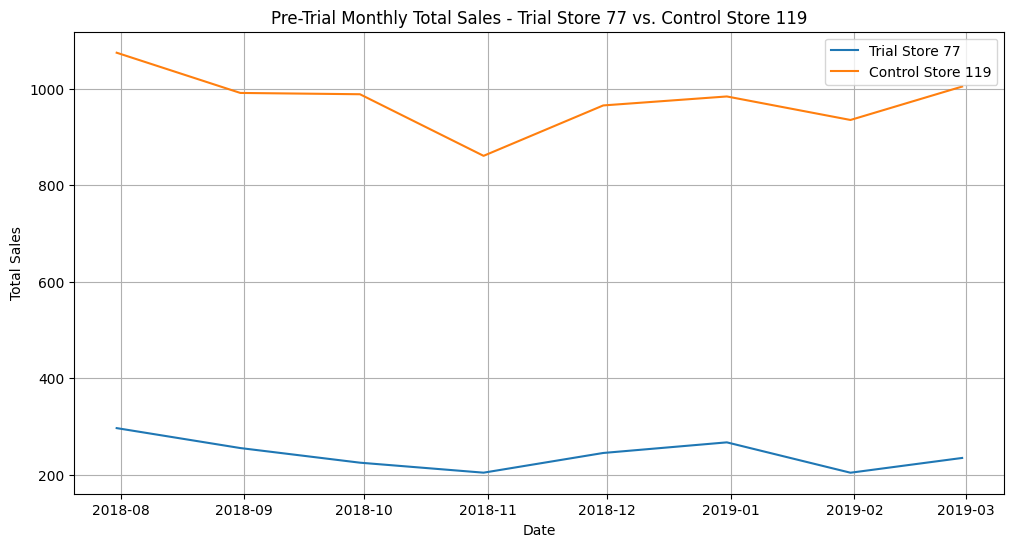

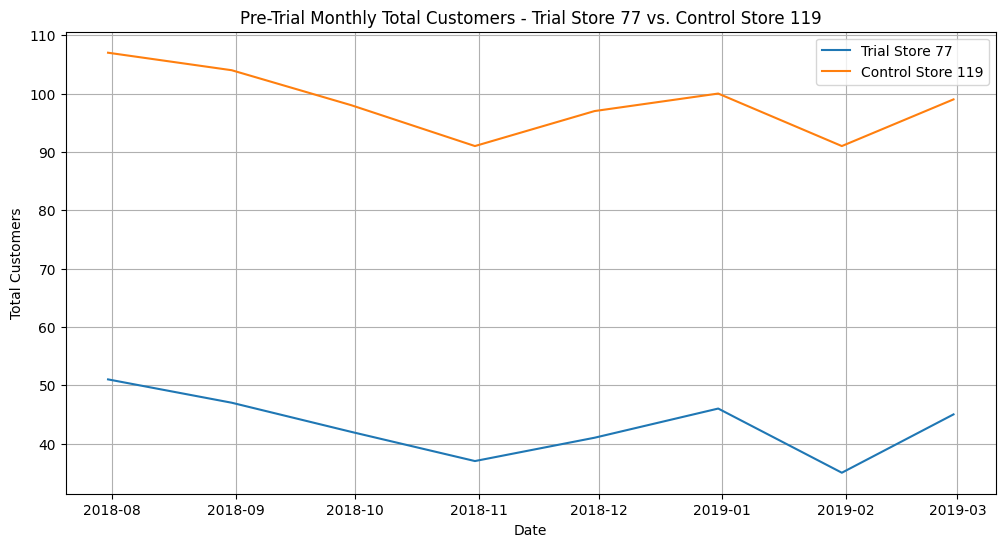

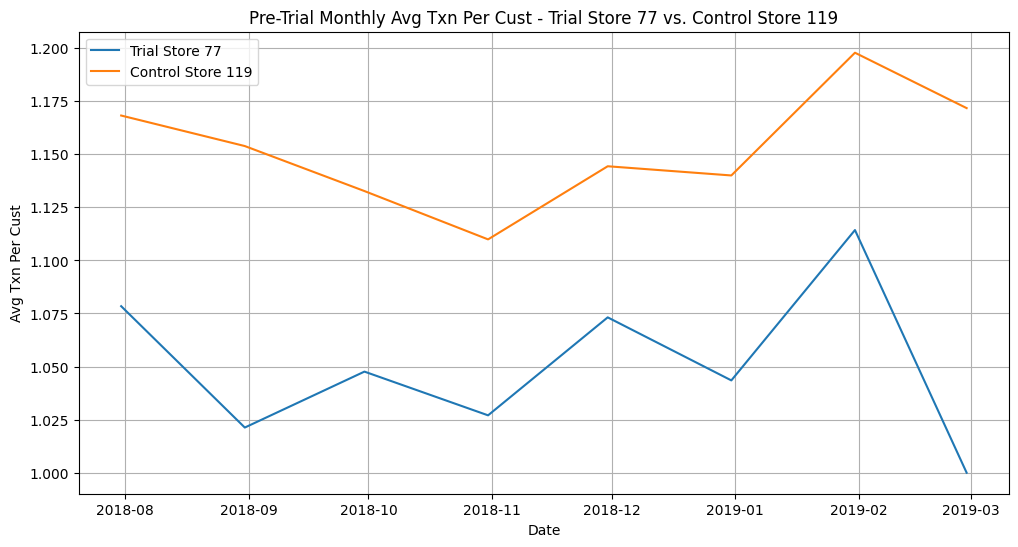

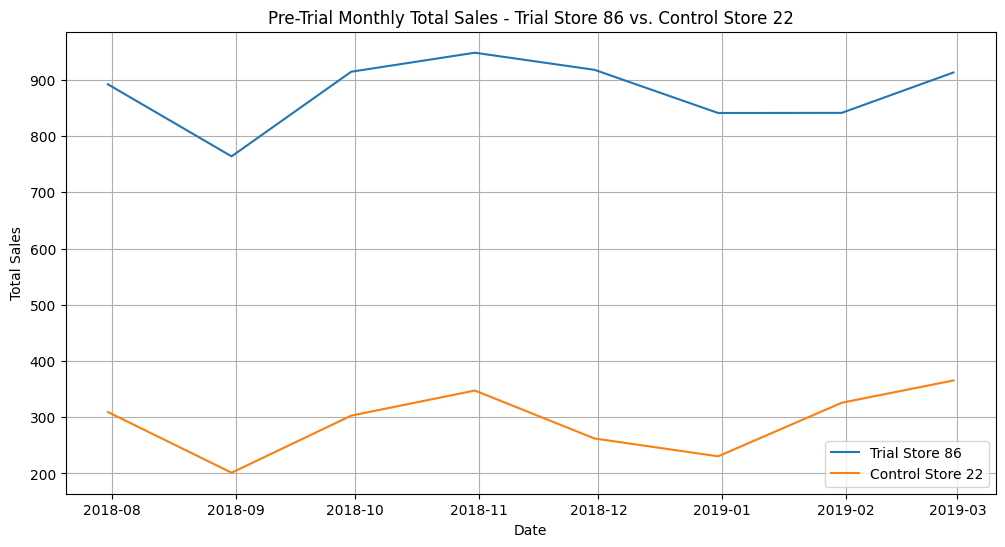

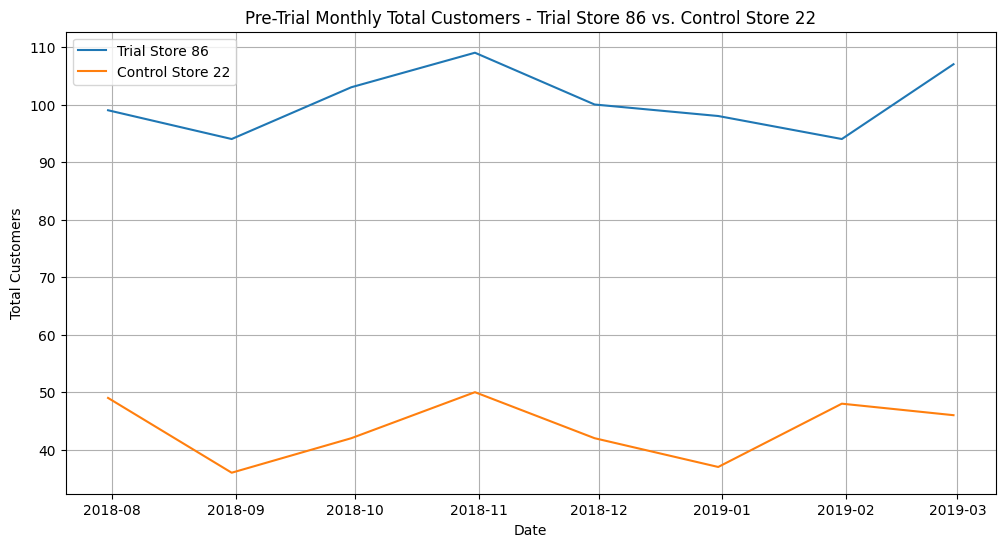

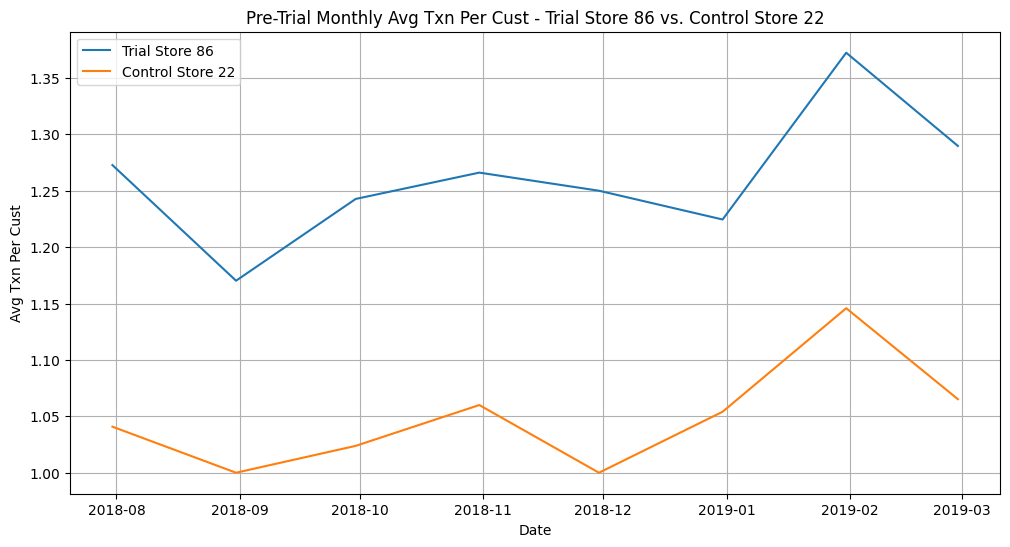

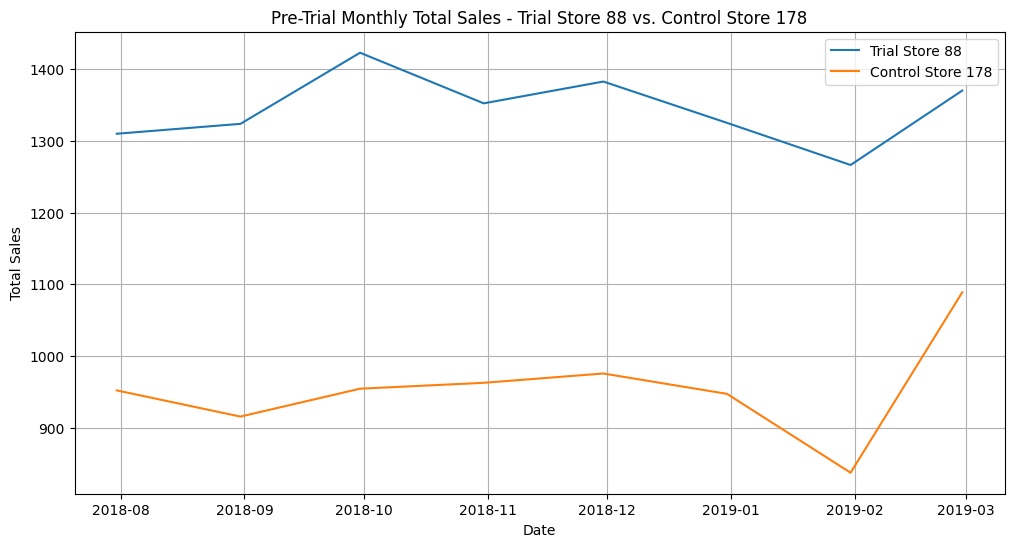

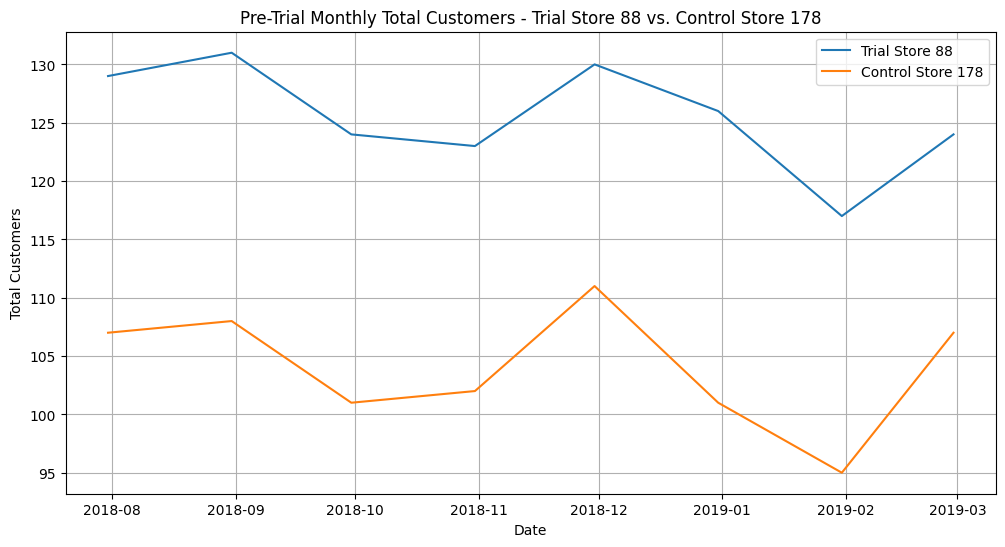

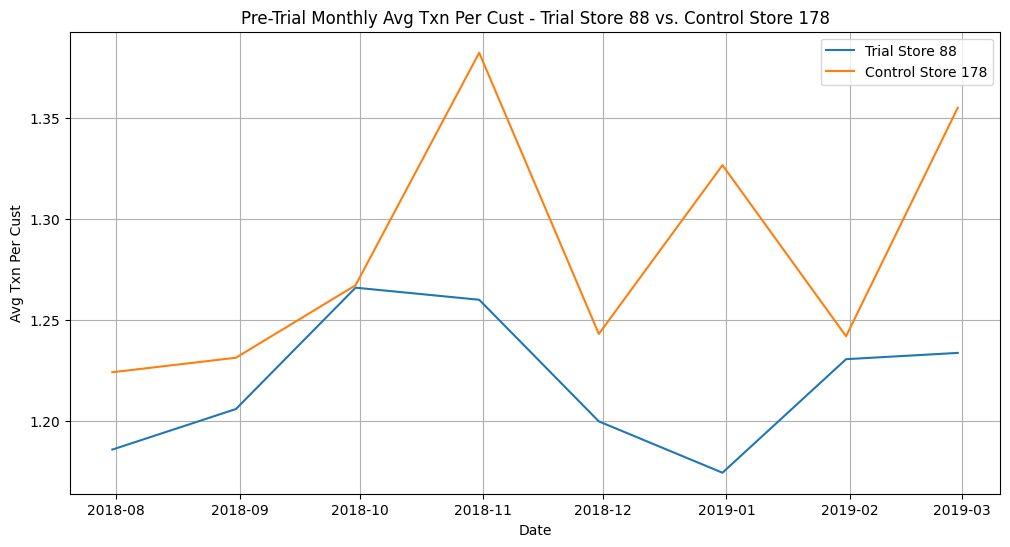

In [46]:

pre_trial_end_date = pd.to_datetime('2019-02-28')

def plot_pre_trial_trends(trial_store, control_store, monthly_data, end_date, metric):
    trial_data = monthly_data[(monthly_data['store_nbr'] == trial_store) & (monthly_data['date'] <= end_date)].set_index('date')
    control_data = monthly_data[(monthly_data['store_nbr'] == control_store) & (monthly_data['date'] <= end_date)].set_index('date')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=trial_data[metric], label=f'Trial Store {trial_store}')
    sns.lineplot(data=control_data[metric], label=f'Control Store {control_store}')
    plt.title(f'Pre-Trial Monthly {metric.replace("_", " ").title()} - Trial Store {trial_store} vs. Control Store {control_store}')
    plt.xlabel('Date')
    plt.ylabel(metric.replace("_", " ").title())
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot pre-trial trends for Trial Store 77 vs. Control Store 119
plot_pre_trial_trends(77, 119, all_stores_monthly, pre_trial_end_date, 'total_sales')
plot_pre_trial_trends(77, 119, all_stores_monthly, pre_trial_end_date, 'total_customers')
plot_pre_trial_trends(77, 119, all_stores_monthly, pre_trial_end_date, 'avg_txn_per_cust')

# Plot pre-trial trends for Trial Store 86 vs. Control Store 22
plot_pre_trial_trends(86, 22, all_stores_monthly, pre_trial_end_date, 'total_sales')
plot_pre_trial_trends(86, 22, all_stores_monthly, pre_trial_end_date, 'total_customers')
plot_pre_trial_trends(86, 22, all_stores_monthly, pre_trial_end_date, 'avg_txn_per_cust')

# Plot pre-trial trends for Trial Store 88 vs. Control Store 178
plot_pre_trial_trends(88, 178, all_stores_monthly, pre_trial_end_date, 'total_sales')
plot_pre_trial_trends(88, 178, all_stores_monthly, pre_trial_end_date, 'total_customers')
plot_pre_trial_trends(88, 178, all_stores_monthly, pre_trial_end_date, 'avg_txn_per_cust')

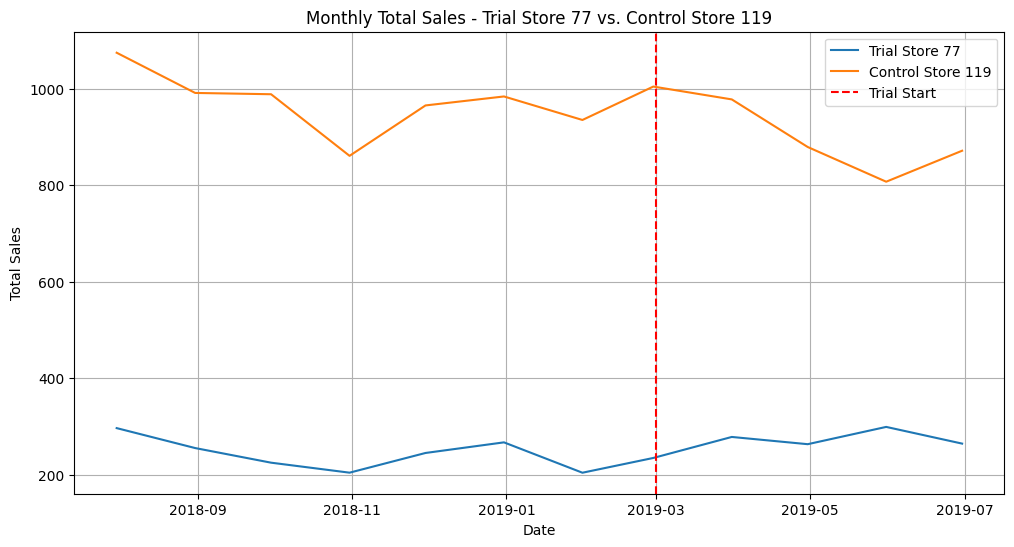

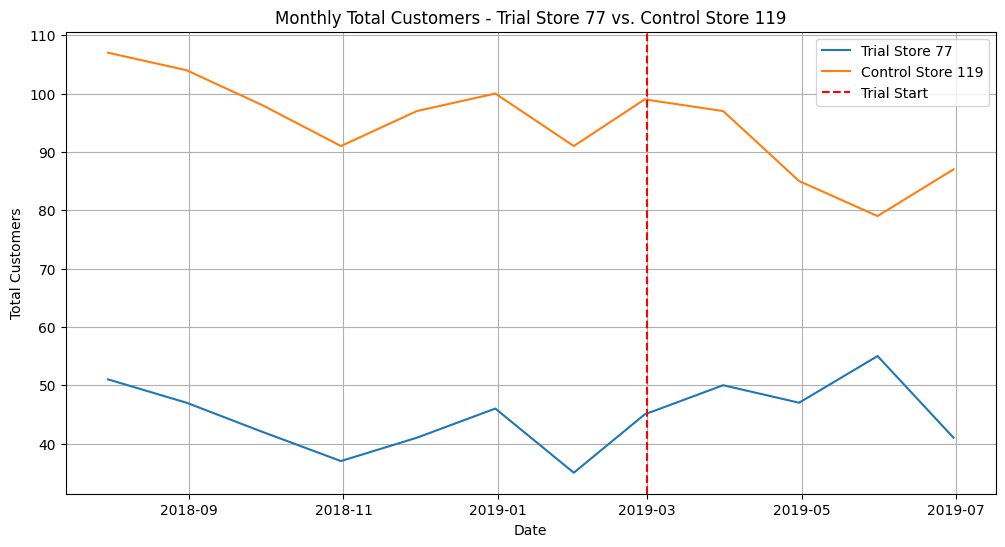

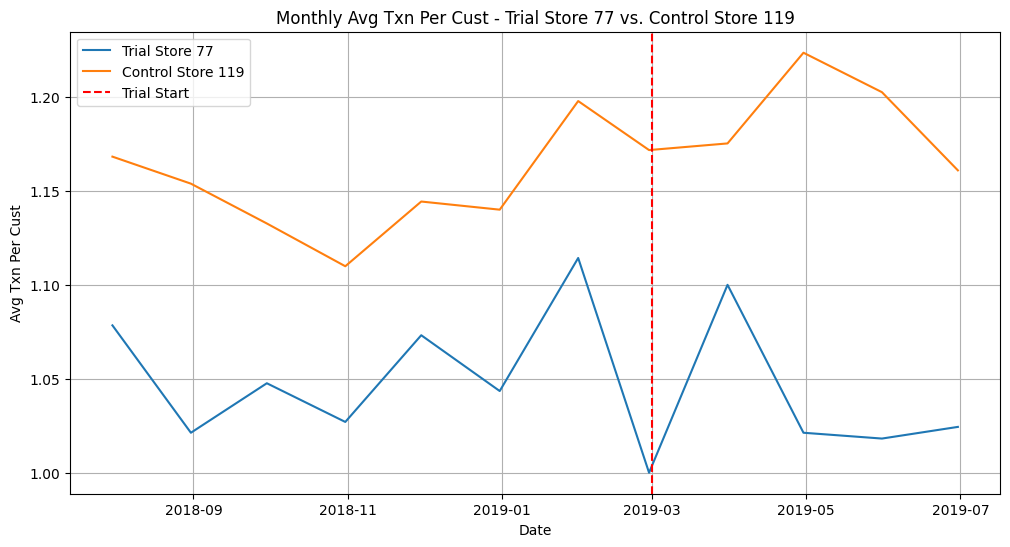

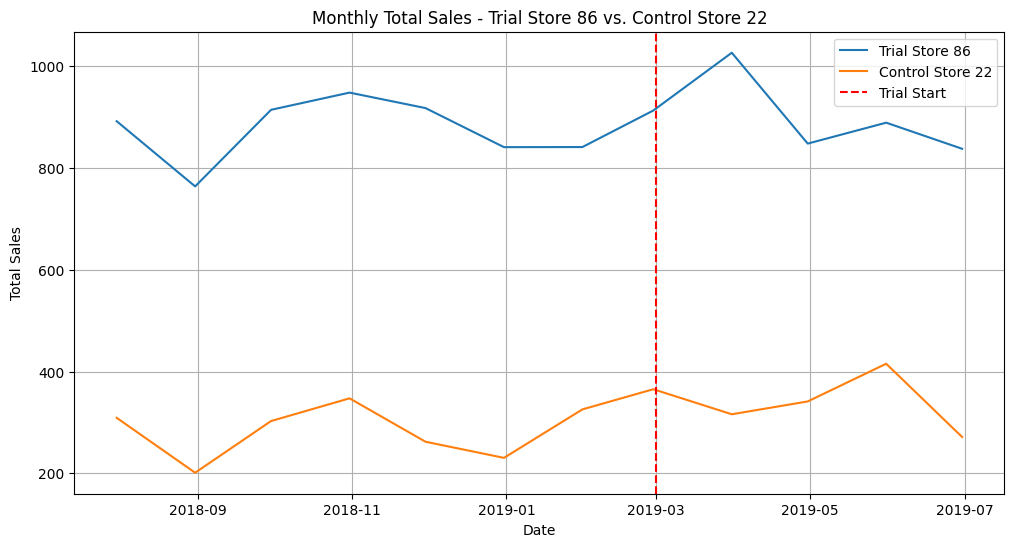

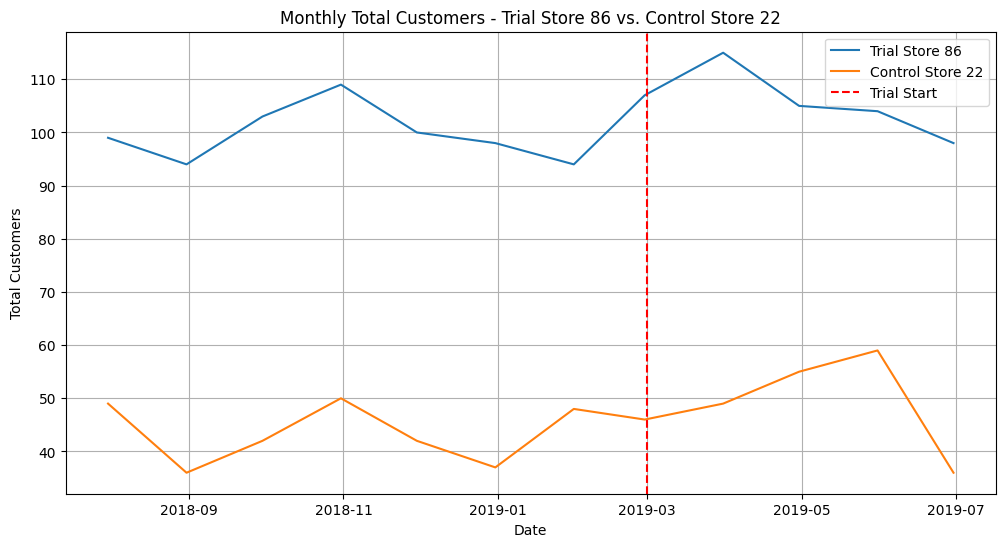

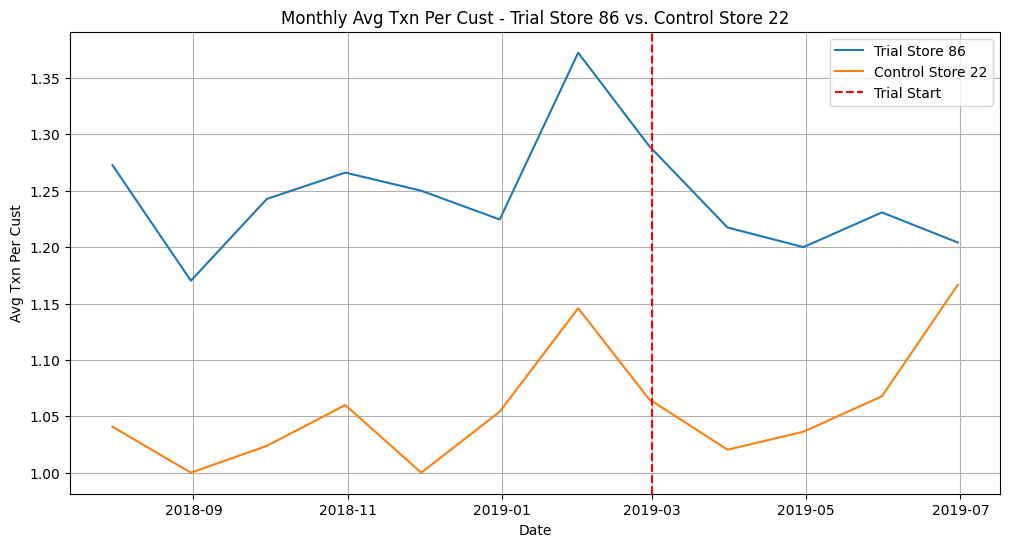

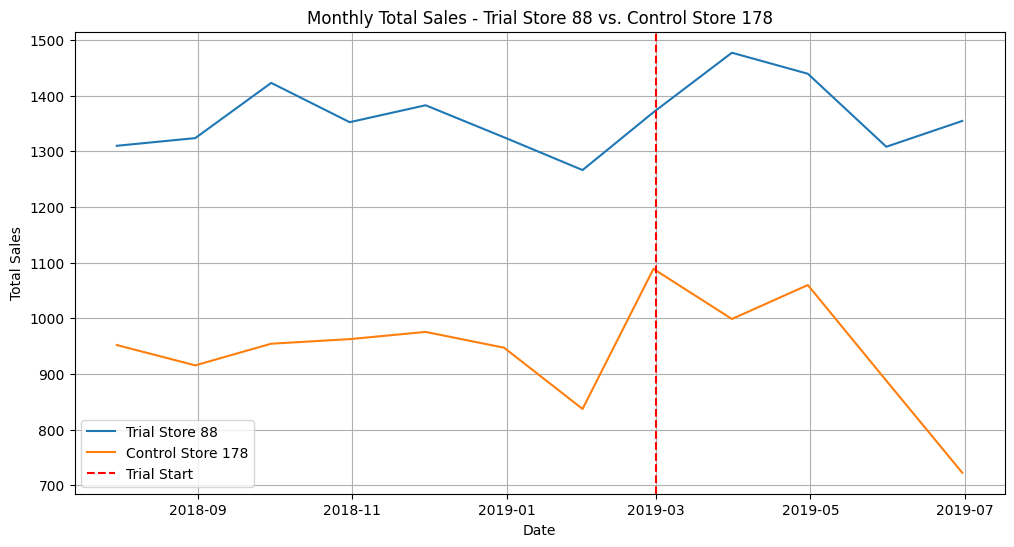

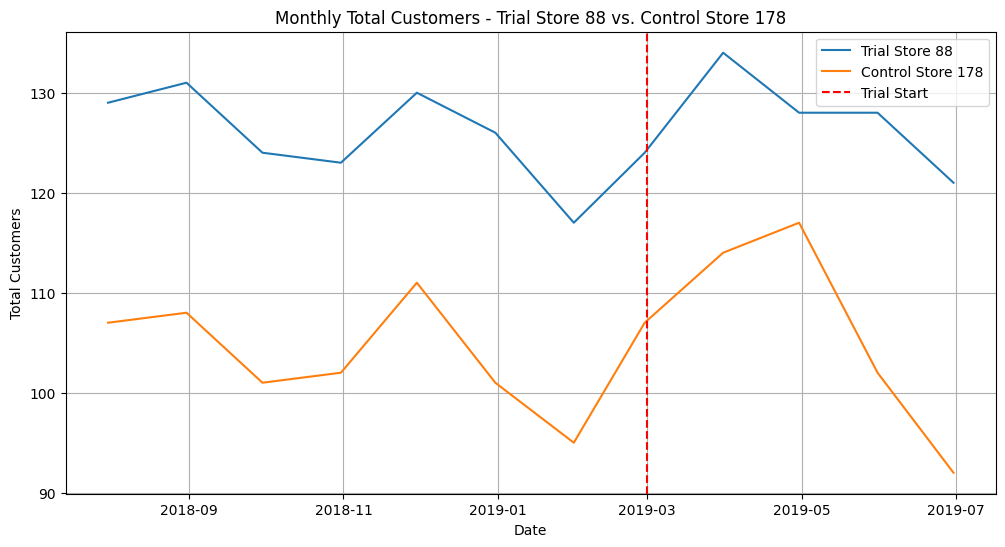

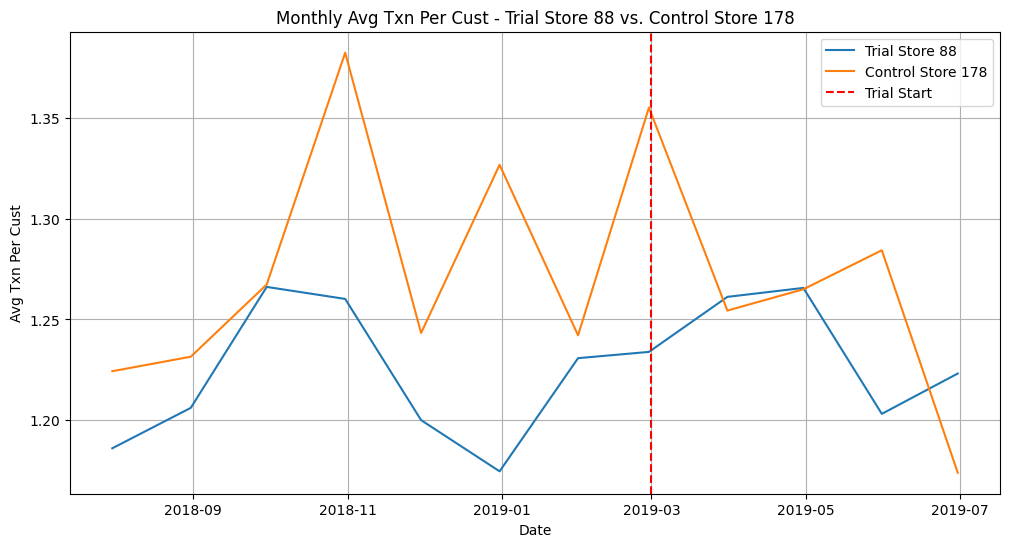

In [47]:
trial_start_date = pd.to_datetime('2019-03-01')

def plot_trial_period_comparison(trial_store, control_store, monthly_data, metric):
    trial_data = monthly_data[monthly_data['store_nbr'] == trial_store].set_index('date')
    control_data = monthly_data[monthly_data['store_nbr'] == control_store].set_index('date')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=trial_data[metric], label=f'Trial Store {trial_store}')
    sns.lineplot(data=control_data[metric], label=f'Control Store {control_store}')
    plt.title(f'Monthly {metric.replace("_", " ").title()} - Trial Store {trial_store} vs. Control Store {control_store}')
    plt.xlabel('Date')
    plt.ylabel(metric.replace("_", " ").title())
    plt.axvline(trial_start_date, color='r', linestyle='--', label='Trial Start')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot trial period comparison for Trial Store 77 vs. Control Store 119
plot_trial_period_comparison(77, 119, all_stores_monthly, 'total_sales')
plot_trial_period_comparison(77, 119, all_stores_monthly, 'total_customers')
plot_trial_period_comparison(77, 119, all_stores_monthly, 'avg_txn_per_cust')

# Plot trial period comparison for Trial Store 86 vs. Control Store 22
plot_trial_period_comparison(86, 22, all_stores_monthly, 'total_sales')
plot_trial_period_comparison(86, 22, all_stores_monthly, 'total_customers')
plot_trial_period_comparison(86, 22, all_stores_monthly, 'avg_txn_per_cust')

# Plot trial period comparison for Trial Store 88 vs. Control Store 178
plot_trial_period_comparison(88, 178, all_stores_monthly, 'total_sales')
plot_trial_period_comparison(88, 178, all_stores_monthly, 'total_customers')
plot_trial_period_comparison(88, 178, all_stores_monthly, 'avg_txn_per_cust')

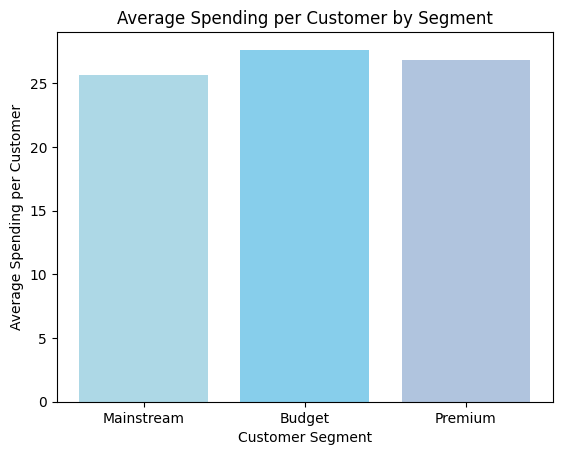

In [49]:
segments = ['Mainstream', 'Budget', 'Premium']
avg_spending = [25.67, 27.63, 26.82]  # Data from the report

plt.bar(segments, avg_spending,  color=['lightblue', 'skyblue', 'lightsteelblue'])
plt.xlabel('Customer Segment')
plt.ylabel('Average Spending per Customer')
plt.title('Average Spending per Customer by Segment')
plt.show()

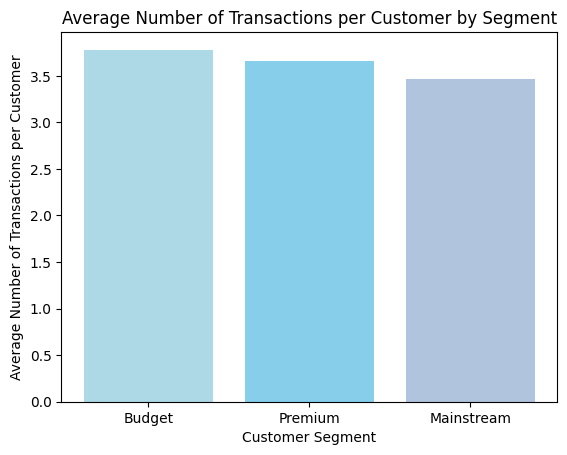

In [50]:
segments = ['Budget', 'Premium', 'Mainstream']
avg_transactions = [3.78, 3.66, 3.47]  # Data from the report

plt.bar(segments, avg_transactions,  color=['lightblue', 'skyblue', 'lightsteelblue'])
plt.xlabel('Customer Segment')
plt.ylabel('Average Number of Transactions per Customer')
plt.title('Average Number of Transactions per Customer by Segment')
plt.show()